In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import cm
%matplotlib inline

sns.set()

## 1. Simulate Data

In [2]:
# simulated data: randomly distributed 1000 points in a unit square
# then randomly assign some labels to each data point
n = 1000
x = np.random.uniform(0, 1, n)  # feature x1
y = np.random.uniform(0, 1, n)  # feature x2

# labels: now we are assigning a real number to all the points
target = norm.pdf((x - 0.75) / 0.1) + norm.pdf((y - 0.75) / 0.1) \
        + norm.pdf((x - 0.25) / 0.1) + norm.pdf((y - 0.25) / 0.1) \
        + np.array(np.round(np.random.normal(-0.1,0.1, n), 2))

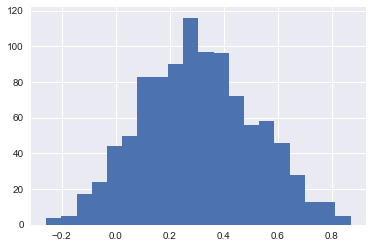

In [3]:
a = plt.hist(target,bins=20)[1]      

In [4]:
# turn the data into a Pandas DataFrame
data = pd.DataFrame({'x' : x, 'y' : y})    # only features of data points
data.head(5)

,x,y
0,0.495905,0.904789
1,0.499451,0.125920
2,0.443309,0.182056
3,0.575381,0.229915
4,0.073796,0.342116


## 2. DecisionTreeRegressor() from sklearn.tree

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [6]:
# fit the Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=20)
# min_sample_leaf=20: there will be NO nodes having data points less than 20

tree.fit(data, target)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3. Plot the fitted data image by taking average of labels in each rectangle

In [7]:
def boxes(tree, data, labels):
    
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    def split(i):
        left = children_left[i]
        right = children_right[i]
        return (left,right)  

    
    def parent(i):
        splits = enumerate([split(i) for i in range(n_nodes)])
        for a,b in splits:
            if (b[0] == i) or (b[1] == i):
                return a
            else: continue

                
    def box(i):
        (a,b),(c,d) = (0,0),(0,0)
    
        if i == 0:
            (a,b) = (0,0)
            (c,d) = (1,1)
        else:
            j = parent(i)
            t = threshold[j]
            (a,b),(c,d) = box(j)
            
            if feature[j] == 0:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (t,d)
                else:
                    (a,b) = (t,b)
                    (c,d) = (c,d)
                    
            if feature[j] == 1:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (c,t)
                else:
                    (a,b) = (a,t)
                    (c,d) = (c,d)
                
        return (a,b),(c,d)

    
    boxes = []
    for i in range(n_nodes):
        boxes.append(box(i))
        
    fig, ax = plt.subplots(figsize = (10,10))
    ax.scatter(x, y, c = target);


    for i in range(1,n_nodes):
        j = parent(i)
        t = threshold[j]
        ((a,b),(c,d)) = boxes[j]
        if feature[j] == 0:
            ax.vlines(t, b, d, colors='k')
        else:
            ax.hlines(t,a,c,colors='k') 

            
    leaves = [x for x in range(n_nodes) if split(x) == (-1,-1)]
    
    leaf_rects = []
    for leaf in leaves:
        ((a,b),(c,d)) = box(leaf)
        rect = Rectangle((a,b), c - a,d - b )
        leaf_rects.append(rect)
        
    
    facecolor = []
    for leaf in leaves:
        points_in_rect = []
        for i in range(len(data)):
            p = data.iloc[i]
            ((a,b),(c,d)) = boxes[leaf]
            if (p['x'] > a) and (p['x'] <= c) and (p['y'] > b) and (p['y'] <= d):
                points_in_rect.append(i)
        
        # color = cm.prism_r(2*np.max([labels[points_in_rect]])-1)
        # in homework, you can put different colors here
        # press "tab" buttom after "cm." command, you will get different color panels
        # and you can put other numbers instead of "2"
        color = cm.prism_r(2*np.average([labels[points_in_rect]])-1)  #take the average in each rectangle to generate image
        facecolor.append(color)  
    
    pc = PatchCollection(leaf_rects, facecolor=facecolor, alpha=0.9,
                         edgecolor='k',linewidths = (4,))
        
    fig,ax = plt.subplots(figsize = (10,10))
    ax.add_collection(pc);

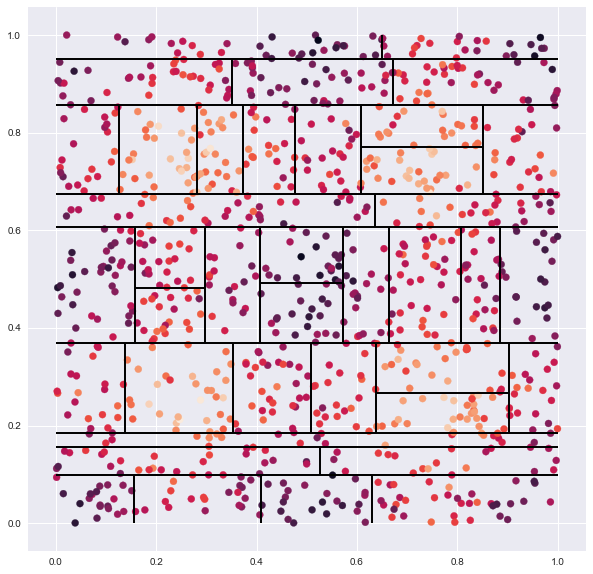

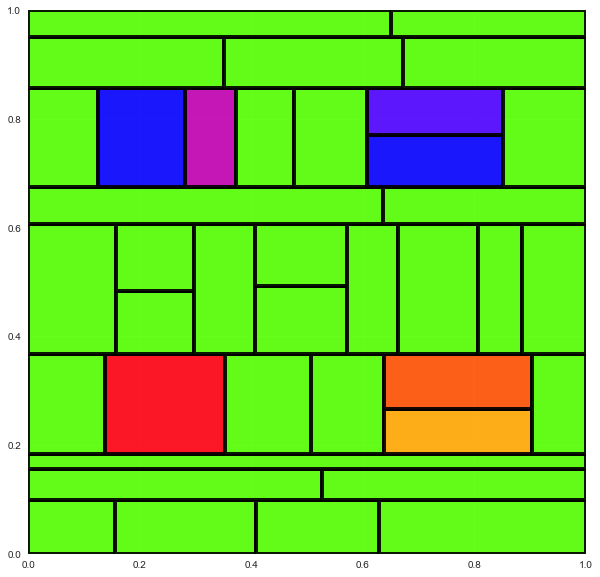

In [8]:
boxes(tree, data, target)

# 1. draw all the subspaces
# 2. then draw the predicted labels into different colors (majority vote)

## 4. Experiment with different color schemes

### (1) 

In [9]:
def boxes(tree, data, labels):
    
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    def split(i):
        left = children_left[i]
        right = children_right[i]
        return (left,right)  

    
    def parent(i):
        splits = enumerate([split(i) for i in range(n_nodes)])
        for a,b in splits:
            if (b[0] == i) or (b[1] == i):
                return a
            else: continue

                
    def box(i):
        (a,b),(c,d) = (0,0),(0,0)
    
        if i == 0:
            (a,b) = (0,0)
            (c,d) = (1,1)
        else:
            j = parent(i)
            t = threshold[j]
            (a,b),(c,d) = box(j)
            
            if feature[j] == 0:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (t,d)
                else:
                    (a,b) = (t,b)
                    (c,d) = (c,d)
                    
            if feature[j] == 1:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (c,t)
                else:
                    (a,b) = (a,t)
                    (c,d) = (c,d)
                
        return (a,b),(c,d)

    
    boxes = []
    for i in range(n_nodes):
        boxes.append(box(i))
        
    fig, ax = plt.subplots(figsize = (10,10))
    ax.scatter(x, y, c = target);


    for i in range(1,n_nodes):
        j = parent(i)
        t = threshold[j]
        ((a,b),(c,d)) = boxes[j]
        if feature[j] == 0:
            ax.vlines(t, b, d, colors='k')
        else:
            ax.hlines(t,a,c,colors='k') 

            
    leaves = [x for x in range(n_nodes) if split(x) == (-1,-1)]
    
    leaf_rects = []
    for leaf in leaves:
        ((a,b),(c,d)) = box(leaf)
        rect = Rectangle((a,b), c - a,d - b )
        leaf_rects.append(rect)
        
    
    facecolor = []
    for leaf in leaves:
        points_in_rect = []
        for i in range(len(data)):
            p = data.iloc[i]
            ((a,b),(c,d)) = boxes[leaf]
            if (p['x'] > a) and (p['x'] <= c) and (p['y'] > b) and (p['y'] <= d):
                points_in_rect.append(i)
        
        # color = cm.prism_r(2*np.max([labels[points_in_rect]])-1)
        # in homework, you can put different colors here
        # press "tab" buttom after "cm." command, you will get different color panels
        # and you can put other numbers instead of "2"
        color = cm.Accent_r(2*np.average([labels[points_in_rect]])-1)  #take the average in each rectangle to generate image
        facecolor.append(color)  
    
    pc = PatchCollection(leaf_rects, facecolor=facecolor, alpha=0.9,
                         edgecolor='k',linewidths = (4,))
        
    fig,ax = plt.subplots(figsize = (10,10))
    ax.add_collection(pc);

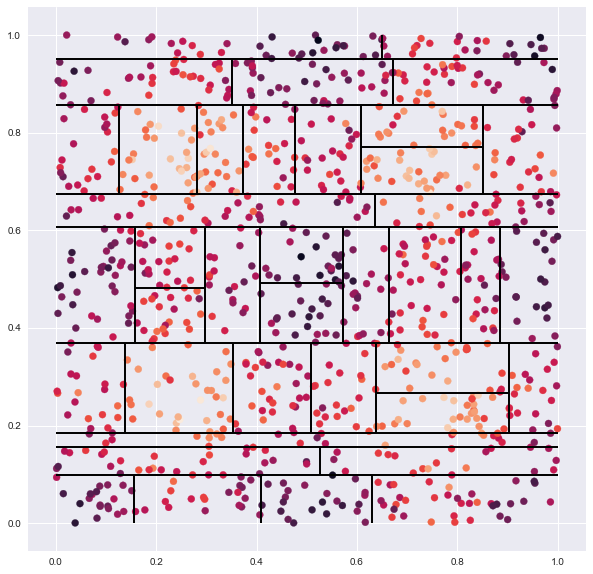

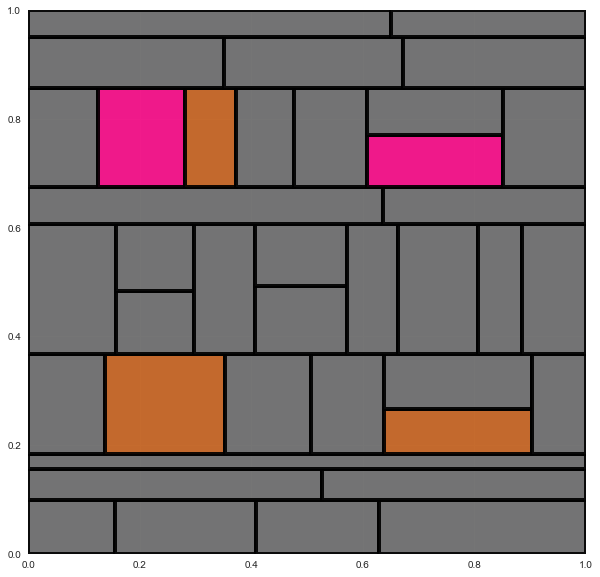

In [10]:
boxes(tree, data, target)

# 1. draw all the subspaces
# 2. then draw the predicted labels into different colors (majority vote)

### (2) 

In [11]:
def boxes(tree, data, labels):
    
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    def split(i):
        left = children_left[i]
        right = children_right[i]
        return (left,right)  

    
    def parent(i):
        splits = enumerate([split(i) for i in range(n_nodes)])
        for a,b in splits:
            if (b[0] == i) or (b[1] == i):
                return a
            else: continue

                
    def box(i):
        (a,b),(c,d) = (0,0),(0,0)
    
        if i == 0:
            (a,b) = (0,0)
            (c,d) = (1,1)
        else:
            j = parent(i)
            t = threshold[j]
            (a,b),(c,d) = box(j)
            
            if feature[j] == 0:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (t,d)
                else:
                    (a,b) = (t,b)
                    (c,d) = (c,d)
                    
            if feature[j] == 1:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (c,t)
                else:
                    (a,b) = (a,t)
                    (c,d) = (c,d)
                
        return (a,b),(c,d)

    
    boxes = []
    for i in range(n_nodes):
        boxes.append(box(i))
        
    fig, ax = plt.subplots(figsize = (10,10))
    ax.scatter(x, y, c = target);


    for i in range(1,n_nodes):
        j = parent(i)
        t = threshold[j]
        ((a,b),(c,d)) = boxes[j]
        if feature[j] == 0:
            ax.vlines(t, b, d, colors='k')
        else:
            ax.hlines(t,a,c,colors='k') 

            
    leaves = [x for x in range(n_nodes) if split(x) == (-1,-1)]
    
    leaf_rects = []
    for leaf in leaves:
        ((a,b),(c,d)) = box(leaf)
        rect = Rectangle((a,b), c - a,d - b )
        leaf_rects.append(rect)
        
    
    facecolor = []
    for leaf in leaves:
        points_in_rect = []
        for i in range(len(data)):
            p = data.iloc[i]
            ((a,b),(c,d)) = boxes[leaf]
            if (p['x'] > a) and (p['x'] <= c) and (p['y'] > b) and (p['y'] <= d):
                points_in_rect.append(i)
        
        # color = cm.prism_r(2*np.max([labels[points_in_rect]])-1)
        # in homework, you can put different colors here
        # press "tab" buttom after "cm." command, you will get different color panels
        # and you can put other numbers instead of "2"
        color = cm.BrBG_r(2*np.average([labels[points_in_rect]])-1)  #take the average in each rectangle to generate image
        facecolor.append(color)  
    
    pc = PatchCollection(leaf_rects, facecolor=facecolor, alpha=0.9,
                         edgecolor='k',linewidths = (4,))
        
    fig,ax = plt.subplots(figsize = (10,10))
    ax.add_collection(pc);

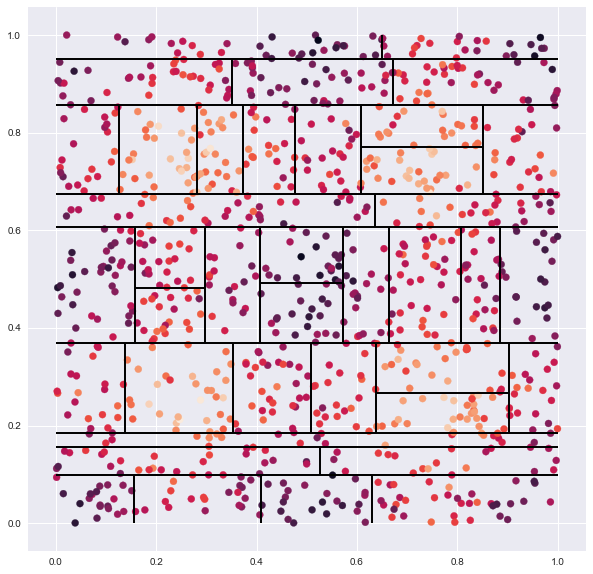

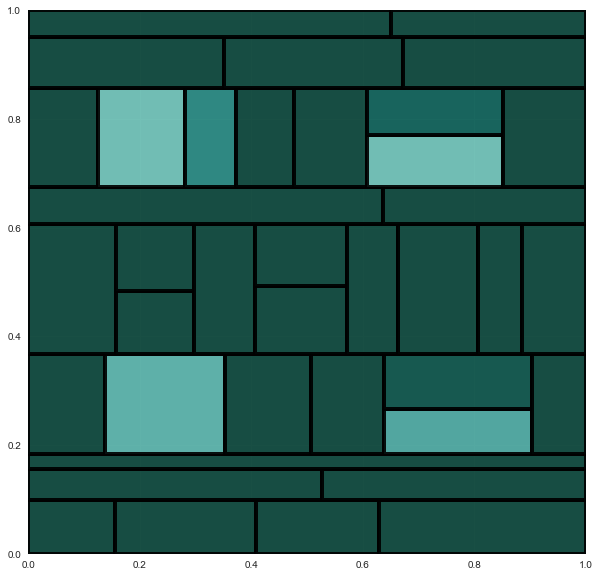

In [12]:
boxes(tree, data, target)

# 1. draw all the subspaces
# 2. then draw the predicted labels into different colors (majority vote)

## (3)

In [13]:
def boxes(tree, data, labels):
    
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    def split(i):
        left = children_left[i]
        right = children_right[i]
        return (left,right)  

    
    def parent(i):
        splits = enumerate([split(i) for i in range(n_nodes)])
        for a,b in splits:
            if (b[0] == i) or (b[1] == i):
                return a
            else: continue

                
    def box(i):
        (a,b),(c,d) = (0,0),(0,0)
    
        if i == 0:
            (a,b) = (0,0)
            (c,d) = (1,1)
        else:
            j = parent(i)
            t = threshold[j]
            (a,b),(c,d) = box(j)
            
            if feature[j] == 0:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (t,d)
                else:
                    (a,b) = (t,b)
                    (c,d) = (c,d)
                    
            if feature[j] == 1:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (c,t)
                else:
                    (a,b) = (a,t)
                    (c,d) = (c,d)
                
        return (a,b),(c,d)

    
    boxes = []
    for i in range(n_nodes):
        boxes.append(box(i))
        
    fig, ax = plt.subplots(figsize = (10,10))
    ax.scatter(x, y, c = target);


    for i in range(1,n_nodes):
        j = parent(i)
        t = threshold[j]
        ((a,b),(c,d)) = boxes[j]
        if feature[j] == 0:
            ax.vlines(t, b, d, colors='k')
        else:
            ax.hlines(t,a,c,colors='k') 

            
    leaves = [x for x in range(n_nodes) if split(x) == (-1,-1)]
    
    leaf_rects = []
    for leaf in leaves:
        ((a,b),(c,d)) = box(leaf)
        rect = Rectangle((a,b), c - a,d - b )
        leaf_rects.append(rect)
        
    
    facecolor = []
    for leaf in leaves:
        points_in_rect = []
        for i in range(len(data)):
            p = data.iloc[i]
            ((a,b),(c,d)) = boxes[leaf]
            if (p['x'] > a) and (p['x'] <= c) and (p['y'] > b) and (p['y'] <= d):
                points_in_rect.append(i)
        
        # color = cm.prism_r(2*np.max([labels[points_in_rect]])-1)
        # in homework, you can put different colors here
        # press "tab" buttom after "cm." command, you will get different color panels
        # and you can put other numbers instead of "2"
        color = cm.CMRmap_r(2*np.average([labels[points_in_rect]])-1)  #take the average in each rectangle to generate image
        facecolor.append(color)  
    
    pc = PatchCollection(leaf_rects, facecolor=facecolor, alpha=0.9,
                         edgecolor='k',linewidths = (4,))
        
    fig,ax = plt.subplots(figsize = (10,10))
    ax.add_collection(pc);

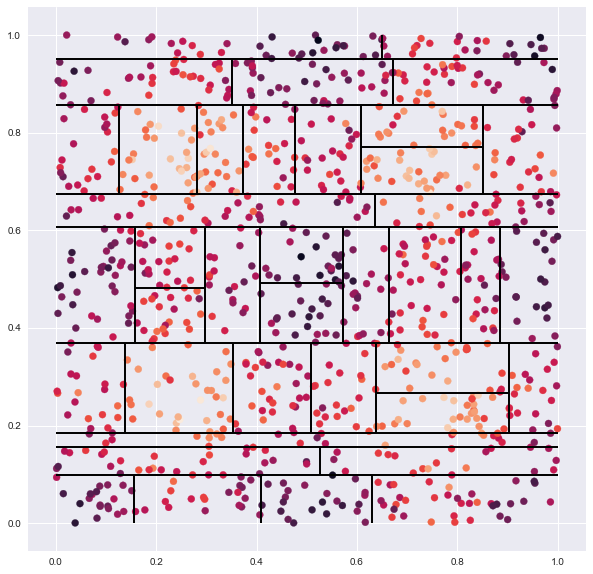

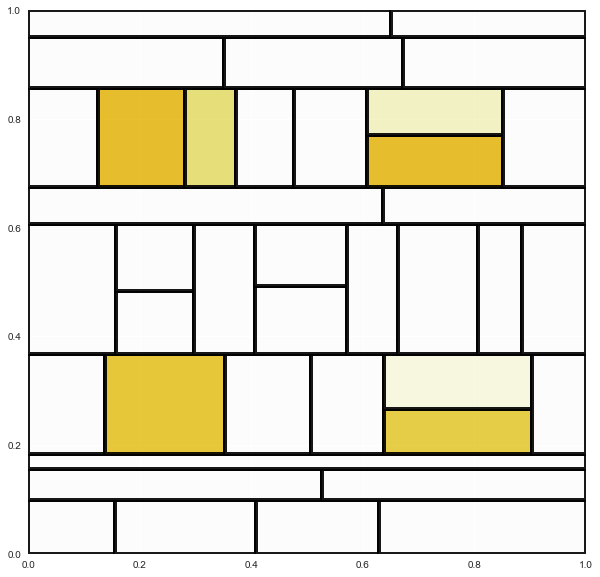

In [14]:
boxes(tree, data, target)

# 1. draw all the subspaces
# 2. then draw the predicted labels into different colors (majority vote)